In [ ]:
# Task 1: Programming - Image Segmentation
# Building on the segmentation exercise from last week. You have explored the task 
# of image segmentation in RGB color space. Equipped with the knowledge from the lecture, 
# choose at least one other color space, and repeat the task. Display and describe your 
# observations and experience. Feel free to use other images.

CIELAB (also referred to as LAB) color space separates the luminance (lightness) from the color information, represented by two axes:<br>
- L channel: Represents the lightness of the color (from black to white).
- A channel: Represents the color spectrum from green to magenta.
- B channel: Represents the color spectrum from blue to yellow.
<br>

This separation allows for more robust color segmentation because the color information is separated from the lightness, which makes it less sensitive to changes in lighting conditions.

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

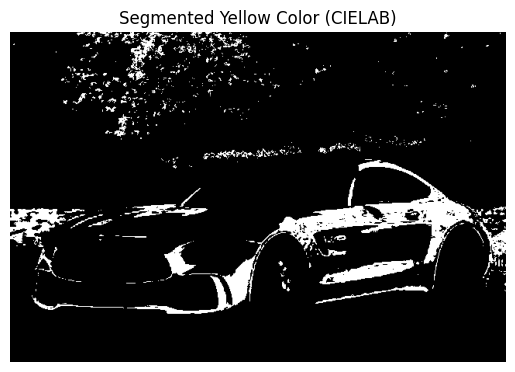

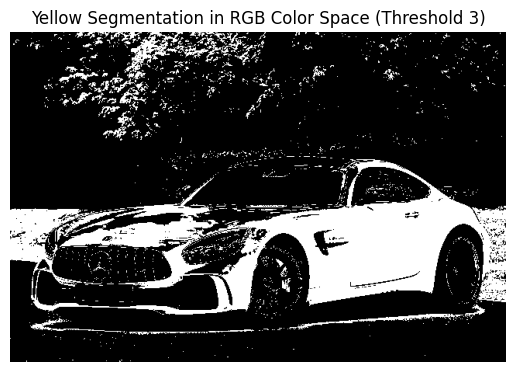

In [3]:
# Read the image
image = cv2.imread('car.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB image to CIELAB color space
image_lab = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)

# Define the lower and upper bounds for the yellow color in LAB color space
# Approximate LAB values for yellow (LAB values vary for different lighting conditions)
lower_yellow_lab = np.array([120, 110, 170], dtype=np.uint8)
upper_yellow_lab = np.array([250, 130, 210], dtype=np.uint8)

# Create a binary mask for the yellow color in LAB color space
mask_yellow_lab = cv2.inRange(image_lab, lower_yellow_lab, upper_yellow_lab)

# Apply the mask to the original image
# yellow_segmented = cv2.bitwise_not(mask_yellow_lab)

# Display the binary mask for the yellow color segmentation in LAB color space
plt.imshow(mask_yellow_lab, cmap='gray')
plt.title("Segmented Yellow Color (CIELAB)")
plt.axis("off")
plt.show()


# Let's also compare with the RGB-based segmentation for visual clarity.
# Display the previously generated mask for yellow segmentation in RGB color space (using best threshold)

# Third Threshold
lower_yellow3 = np.array([130, 130, 0], dtype=np.uint8)
upper_yellow3 = np.array([255, 255, 170], dtype=np.uint8)

# Create binary masks for yellow color using the thresholds
mask_yellow3 = cv2.inRange(image_rgb, lower_yellow3, upper_yellow3)

plt.imshow(mask_yellow3, cmap='gray')
plt.title("Yellow Segmentation in RGB Color Space (Threshold 3)")
plt.axis("off")
plt.show()


In [ ]:
# Task 2: Programming - Edge Detection
# In the lecture you were introduced to the concept of edge detection, in this exercise you should apply this new knowledge. 

# a. Choose which approach you want to use. You can choose to use filters as Sobel or Prewitt 
# (as illustrated in the lecture), or more sophisticated canny edge.

# b. Choose one python function to execute image filtering. Which one did you choose and which edge handling do you choose?

# c. Explore and document different variants of you approach. Guiding questions (omit the ones which do not apply to your approach):
# 1. Which filter type and size?
# 2. Which edge handling?
# 3. Which values, e.g. which threshold did you use?
#  4. How did you choose to visualize your results?

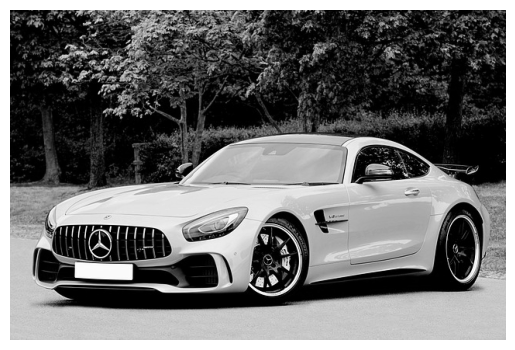

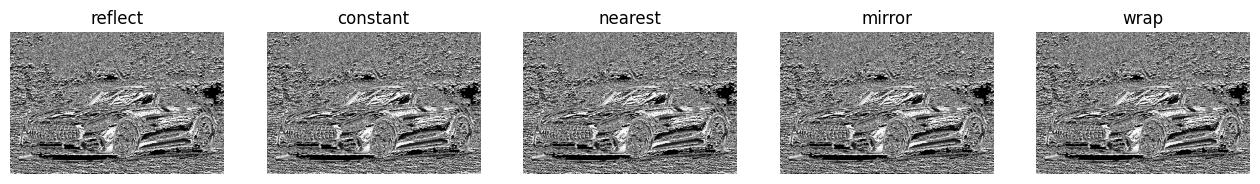

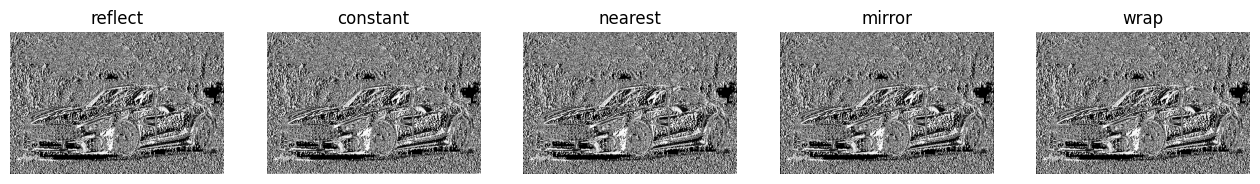

Text(0.5, 1.0, 'Prewitt Edge Detection')

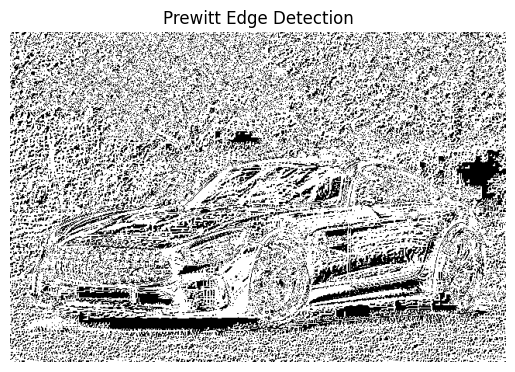

In [8]:
from scipy import ndimage
import matplotlib.pyplot as plt

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

# Prewitt filter
prewitt_h_mode1 = ndimage.prewitt(image_gray, axis=0, mode='reflect') # horizontal edge with reflect mode:  (d c b a | a b c d | d c b a)
prewitt_h_mode2 = ndimage.prewitt(image_gray, axis=0, mode='constant', cval=100.0) # horizontal edge with constant mode:  (k k k k | a b c d | k k k k)
prewitt_h_mode3 = ndimage.prewitt(image_gray, axis=0, mode='nearest') # horizontal edge with nearest mode:  (a a a a | a b c d | d d d d)
prewitt_h_mode4 = ndimage.prewitt(image_gray, axis=0, mode='mirror') # horizontal edge with mirror mode: (d c b | a b c d | c b a)
prewitt_h_mode5 = ndimage.prewitt(image_gray, axis=0, mode='wrap') # horizontal edge with wrap mode: (a b c d | a b c d | a b c d)

fig, axes = plt.subplots(1, 5, figsize = (16, 8))
plt.gray()
axes[0].imshow(prewitt_h_mode1)
axes[1].imshow(prewitt_h_mode2)
axes[2].imshow(prewitt_h_mode3)
axes[3].imshow(prewitt_h_mode4)
axes[4].imshow(prewitt_h_mode5)
titles = ["reflect", "constant", "nearest", "mirror", "wrap"]
for i, ax in enumerate(axes.ravel()):
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()

prewitt_v_mode1 = ndimage.prewitt(image_gray, axis=1, mode='reflect') # horizontal edge with reflect mode:  (d c b a | a b c d | d c b a)
prewitt_v_mode2 = ndimage.prewitt(image_gray, axis=1, mode='constant', cval=1000.0) # horizontal edge with constant mode:  (k k k k | a b c d | k k k k)
prewitt_v_mode3 = ndimage.prewitt(image_gray, axis=1, mode='nearest') # horizontal edge with nearest mode:  (a a a a | a b c d | d d d d)
prewitt_v_mode4 = ndimage.prewitt(image_gray, axis=1, mode='mirror') # horizontal edge with mirror mode: (d c b | a b c d | c b a)
prewitt_v_mode5 = ndimage.prewitt(image_gray, axis=1, mode='wrap') # horizontal edge with wrap mode: (a b c d | a b c d | a b c d)

fig, axes = plt.subplots(1, 5, figsize = (16, 8))
plt.gray()
axes[0].imshow(prewitt_v_mode1)
axes[1].imshow(prewitt_v_mode2)
axes[2].imshow(prewitt_v_mode3)
axes[3].imshow(prewitt_v_mode4)
axes[4].imshow(prewitt_v_mode5)
titles = ["reflect", "constant", "nearest", "mirror", "wrap"]
for i, ax in enumerate(axes.ravel()):
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()


prewitt_magnitude = np.hypot(prewitt_h_mode1, prewitt_v_mode1)
prewitt_magnitude = prewitt_magnitude / prewitt_magnitude.max() * 255


threshold_value = 100  # Adjustable value
_, prewitt_thresholded = cv2.threshold(prewitt_magnitude.astype(np.uint8), threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(prewitt_thresholded, cmap='gray')
plt.axis('off')
plt.title("Prewitt Edge Detection")


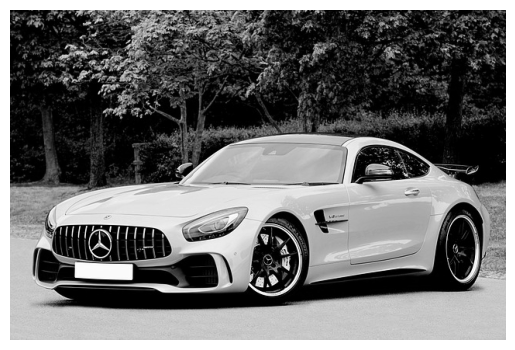

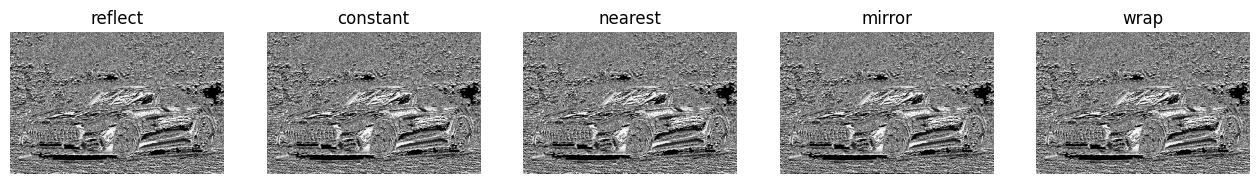

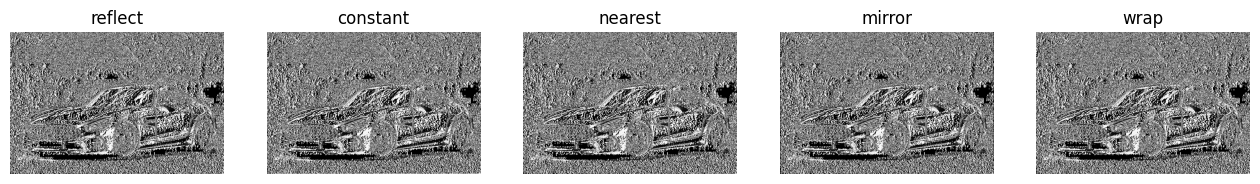

Text(0.5, 1.0, 'Sobel Edge Detection')

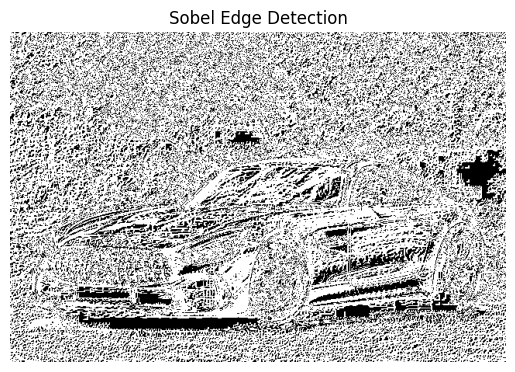

In [7]:
from scipy import ndimage
import matplotlib.pyplot as plt

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

# Sobel filter
sobel_h_mode1 = ndimage.sobel(image_gray, axis=0, mode='reflect') # horizontal edge with reflect mode:  (d c b a | a b c d | d c b a)
sobel_h_mode2 = ndimage.sobel(image_gray, axis=0, mode='constant', cval=100.0) # horizontal edge with constant mode:  (k k k k | a b c d | k k k k)
sobel_h_mode3 = ndimage.sobel(image_gray, axis=0, mode='nearest') # horizontal edge with nearest mode:  (a a a a | a b c d | d d d d)
sobel_h_mode4 = ndimage.sobel(image_gray, axis=0, mode='mirror') # horizontal edge with mirror mode: (d c b | a b c d | c b a)
sobel_h_mode5 = ndimage.sobel(image_gray, axis=0, mode='wrap') # horizontal edge with wrap mode: (a b c d | a b c d | a b c d)

fig, axes = plt.subplots(1, 5, figsize = (16, 8))
plt.gray()
axes[0].imshow(sobel_h_mode1)
axes[1].imshow(sobel_h_mode2)
axes[2].imshow(sobel_h_mode3)
axes[3].imshow(sobel_h_mode4)
axes[4].imshow(sobel_h_mode5)
titles = ["reflect", "constant", "nearest", "mirror", "wrap"]
for i, ax in enumerate(axes.ravel()):
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()

sobel_v_mode1 = ndimage.sobel(image_gray, axis=1, mode='reflect') # horizontal edge with reflect mode:  (d c b a | a b c d | d c b a)
sobel_v_mode2 = ndimage.sobel(image_gray, axis=1, mode='constant', cval=1000.0) # horizontal edge with constant mode:  (k k k k | a b c d | k k k k)
sobel_v_mode3 = ndimage.sobel(image_gray, axis=1, mode='nearest') # horizontal edge with nearest mode:  (a a a a | a b c d | d d d d)
sobel_v_mode4 = ndimage.sobel(image_gray, axis=1, mode='mirror') # horizontal edge with mirror mode: (d c b | a b c d | c b a)
sobel_v_mode5 = ndimage.sobel(image_gray, axis=1, mode='wrap') # horizontal edge with wrap mode: (a b c d | a b c d | a b c d)

fig, axes = plt.subplots(1, 5, figsize = (16, 8))
plt.gray()
axes[0].imshow(sobel_v_mode1)
axes[1].imshow(sobel_v_mode2)
axes[2].imshow(sobel_v_mode3)
axes[3].imshow(sobel_v_mode4)
axes[4].imshow(sobel_v_mode5)
titles = ["reflect", "constant", "nearest", "mirror", "wrap"]
for i, ax in enumerate(axes.ravel()):
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()


prewitt_magnitude = np.hypot(sobel_h_mode1, sobel_v_mode1)
prewitt_magnitude = prewitt_magnitude / prewitt_magnitude.max() * 255


threshold_value = 100  # You can adjust this value
_, prewitt_thresholded = cv2.threshold(prewitt_magnitude.astype(np.uint8), threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(prewitt_thresholded, cmap='gray')
plt.axis('off')
plt.title("Sobel Edge Detection")
